# HW3

author: Luis Perez

email: luis0@stanford.edu

# Imports

In [1]:
import numpy as np
import pprint
from scipy import linalg
import seaborn as sns

## Problem 1: Memory of a linear, time-invariant system
### Part (b)

In [2]:
# Number of samples
T = 100
# The input
u = np.array([
    0.7700,
    0.0600,
    0.0100,
    0.8000,
    0.6600,
    0.9600,
    0.0300,
    0.3200,
    0.9700,
    0.9400,
    0.3600,
    0.4100,
    0.7000,
    0.1700,
    0.1500,
    0.5000,
    0.9600,
    0.7300,
    0.0800,
    0.9000,
    0.6800,
    0.1100,
    0.8500,
    0.1900,
    0.1600,
    0.8900,
    0.0700,
    0.8300,
    0.2600,
    0.9700,
    0.9100,
    0.3800,
    0.4100,
    0.7000,
    0.3200,
    0.7200,
    0.8600,
    0.1700,
    0.2600,
    0.1900,
    0.9100,
    0.9800,
    0.7900,
    0.3300,
    0.4300,
    0.8200,
    0.3800,
    0.5300,
    0.9000,
    0.8300,
    0.7900,
    0.3600,
    0.0300,
    0.1700,
    0.8500,
    0.6800,
    0.2100,
    0.6400,
    0.5000,
    0.5100,
    0.6000,
    0.1900,
    0.7400,
    0.9800,
    0.2100,
    0.1900,
    0.3300,
    0.1900,
    0.3900,
    0.5900,
    0.8900,
    0.8500,
    0.5200,
    0.3700,
    0.9600,
    0.8400,
    0.4900,
    0.5400,
    0.8700,
    0.0500,
    0.0500,
    0.3800,
    0.4000,
    0.7800,
    0.4500,
    0.4100,
    0.5300,
    0.8900,
    0.9800,
    0.9300,
    0.1900,
    0.9900,
    0.5800,
    0.6500,
    0.2600,
    0.0900,
    0.0400,
    0.1700,
    0.6800,
    0.3900
])

# The output.
y = np.array([
    1.9663,
    2.5611,
    2.0898,
    1.2280,
    1.2092,
    1.4403,
    1.6056,
    1.0081,
    1.2782,
    2.4515,
    2.7882,
    1.8628,
    1.5105,
    2.1557,
    2.4086,
    1.9909,
    1.7859,
    2.0328,
    1.8014,
    1.0792,
    1.6591,
    2.4087,
    2.1433,
    2.1237,
    1.8788,
    1.7544,
    2.0878,
    1.5912,
    1.6593,
    1.4437,
    1.8176,
    2.1338,
    1.8734,
    1.8083,
    2.4560,
    2.4541,
    2.3812,
    2.1748,
    1.7084,
    1.6541,
    1.8287,
    2.3495,
    2.2745,
    1.6575,
    1.2851,
    1.9121,
    2.8243,
    2.6995,
    2.1301,
    2.1108,
    2.2646,
    2.2775,
    2.0367,
    1.9813,
    2.3103,
    2.6761,
    2.1503,
    1.1300,
    1.1453,
    1.7349,
    2.0853,
    2.0011,
    1.6036,
    1.9028,
    2.3020,
    1.7725,
    1.4568,
    1.7929,
    2.0215,
    1.8469,
    1.4356,
    1.3920,
    1.5152,
    1.4999,
    1.7441,
    2.6239,
    2.9211,
    2.4077,
    2.0847,
    2.5268,
    2.3471,
    1.9722,
    1.9461,
    1.9477,
    1.7484,
    1.1384,
    0.9787,
    1.5102,
    2.1821,
    2.3770,
    2.2443,
    1.8250,
    2.6027,
    3.0107,
    2.8894,
    2.2339,
    1.9132,
    1.8799,
    1.8463,
    1.6423
])
assert y.shape[0] == u.shape[0]
assert u.shape[0] == T

In [3]:
def isValidMemory(M, u, y, eps=1e-4):
    """Uses the process described in the homework to check if
    M is a valid memory value for the given inputs u and outputs y.
    """
    # Creates the A matrix described in the handout.
    T = y.shape[0]
    A = linalg.toeplitz(c=u[M-1:T-1], r=np.flip(u[:M]))
    assert u.shape[0] == T
    assert A.shape == (T-M, M)

    # Find the closests hs that work.
    ybar = y[M:]
    hbar = np.dot(np.linalg.inv(np.dot(A.T, A)), np.dot(A.T, ybar))
    return np.linalg.norm(ybar - np.dot(A, hbar)) < eps, hbar

In [4]:
def findSmallestValidM(u,y):
    T = u.shape[0]
    for m in range(1, T // 2):
        isValid, candidate = isValidMemory(m,u,y)
        import pdb
        pdb.set_trace
        if isValid:
            return m, candidate
    assert False

In [5]:
smallestM, weights = findSmallestValidM(u,y)
print("The memory of our given data is %s." % smallestM)
pprint.pprint(weights)

The memory of our given data is 7.
array([0.63, 0.27, 0.02, 0.37, 0.96, 0.95, 0.46])


## Problem 3: Sensor integrity monitor

In [6]:
# Copied from homework assignment.
A = np.array([
    [1, 2, 3],
    [1, -1, -2],
    [-2, 1, 3],
    [1, -1, -2],
    [1, 1, 0]
])

In [7]:
def findBMatrix(A, eps=1e-3):
    B = linalg.null_space(A.T).T
    B[np.abs(B) < eps] = 0
    B /= np.abs(B[B != 0]).min()
    return B

In [8]:
B = findBMatrix(A)

In [9]:
def checkMatrixIsIntegrityMonitor(measureMatrix, integrityMonitor, eps=1e-3):
    M, N = measureMatrix.shape
    # Generate all unit vectors in input space.
    inputBasis = np.identity(N)
    
    # Assert all consistent values will output zero by monitor.
    for i in range(N):
        measurement = np.dot(measureMatrix, inputBasis[:,i])
        assert np.linalg.norm(np.dot(integrityMonitor, measurement)) < eps
        
        # Inconsistent by adding random noise (high likelihood)
        badMeasurement = measurement + np.random.rand(M)
        assert np.linalg.norm(np.dot(integrityMonitor, badMeasurement)) > eps

In [10]:
checkMatrixIsIntegrityMonitor(A, B)

In [11]:
B

array([[ 0.        , -5.47259193,  2.        ,  8.47259193,  1.        ],
       [ 0.        ,  6.97831636,  6.39848918,  2.61941742,  3.19924459]])

## Problem 4: Coin collector robot
### Part (c)

In [12]:
n=6;
x = [
    0.5000,
    2.0000,
    2.0000,
   -2.0000,
   -4.5000,
         0,
   13.0000,
   -4.0000,
   -6.0000,
   12.0000,
   22.5000,
   -2.0000]

[Text(0, 0.5, 'y-position'), Text(0.5, 0, 'x-position')]

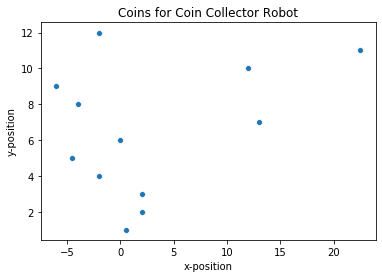

In [13]:
# Plot of the coins.
ax = sns.scatterplot(x=x, y=range(1,2*n + 1))
ax.set_title("Coins for Coin Collector Robot")
ax.set(xlabel='x-position', ylabel='y-position')

In [14]:
def generateAMatrix(n, missingRowIndex=None):
    """
    Generates A as specified in the handout with 
    missingRowIndex missing (if set).
    """
    def generateCRow(t):
        c = np.zeros(n)
        for i in range(t // 2):
                c[i] = 2 + 2*(t - 2*(i+1))
        # If t is odd, we need to add the final push.
        if t % 2 != 0:
            c[t // 2] = 0.5
        return c
    return np.stack([generateCRow(i+1) for i in range(2*n)
                     if missingRowIndex is None or missingRowIndex != i]) 

In [15]:
def isCollectible(x, n, missingRowIndex=None, eps=1e-3):
    """Returns true if the coins with the given x-coordinates are collectible"""
    A = generateAMatrix(n, missingRowIndex)
    fhat = np.dot(np.linalg.inv(np.dot(A.T, A)), np.dot(A.T,x))
    if linalg.norm(np.dot(A, fhat) - x) < eps:
        return fhat
    return None

In [16]:
if isCollectible(x, n):
    print("The coins can be collected.")
else:
    print("The coins cannot be collected.")

The coins cannot be collected.


In [17]:
def collectAllButOne(x, n):
    """Tries to collect all coins except 1.
    
    Returns the forces and the index of the bad coin.
    """
    indexes = []
    forces = []
    coins = []
    for i in range(2*n):
        xMissing = np.delete(x, i)
        maybeFhat = isCollectible(xMissing, n, missingRowIndex=i)
        if maybeFhat is not None:
            indexes.append(i)
            forces.append(maybeFhat)
            coins.append((x[i], i+1))
    assert len(indexes) == 1
    assert len(forces) == 1
    assert len(coins) == 1
    return indexes[0], coins[0], forces[0],

In [18]:
badCoinIndex, badCoin, forcesToCollectAllButOne = collectAllButOne(x, n)

In [19]:
print("The %s-th coin (1-indexed) is the coin which cannot be collected." % (badCoinIndex + 1))
print("The bad coin is located at (%s,%s)." % (badCoin))

The 7-th coin (1-indexed) is the coin which cannot be collected.
The bad coin is located at (13.0,7).


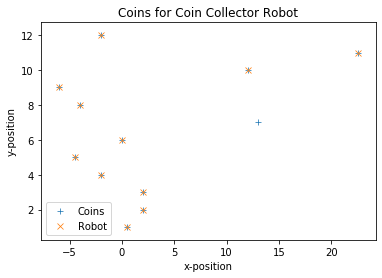

In [20]:
validA = generateAMatrix(n, missingRowIndex=badCoinIndex)
robotXPositions = np.dot(validA, forcesToCollectAllButOne)

# Generate the plot for everything (except the missing coin)
ax = sns.scatterplot(x=x, y=range(1,2*n + 1), marker="+", label="Coins")
ax = sns.scatterplot(x=robotXPositions,
                     y=list(range(1,badCoinIndex + 1)) + list(range(badCoinIndex + 2, 2*n + 1)),
                     marker='x', label="Robot")
ax.set_title("Coins for Coin Collector Robot")
ax.set(xlabel='x-position', ylabel='y-position')
ax.get_figure().savefig("robot_collector")

## Problem 6: Quadratic Extrapolation of Time Series using Least-Squares Fit
### Part (a)

In [23]:
def computeCMatrix(t):
    """
    For a given value of t, computes the C matrix
    as defined in the handout.
    """
    PAST_SAMPLES = 10
    F1 = [1] * PAST_SAMPLES
    F2 = [t - i for i in range(PAST_SAMPLES)]
    F3 = [(t - i)**2 for i in range(PAST_SAMPLES)]
    F = np.stack((F1, F2, F3), axis=1)
    t = np.array([1, t + 1, (t + 1)**2])
    C = np.dot(np.dot(t, np.linalg.inv(np.dot(F.T, F))), F.T)
    return C

In [24]:
def verifiyCIsTimeInvariant(eps=1e-4):
    for t in range(1000):
        C1 = computeCMatrix(t + 1)
        C2 = computeCMatrix(t + 2)
        if not linalg.norm(C1 - C2) < eps:
            print(linalg.norm(C1 - C2))
    return computeCMatrix(1)

In [25]:
computeCMatrix(1)

array([ 0.9       ,  0.5       ,  0.18333333, -0.05      , -0.2       ,
       -0.26666667, -0.25      , -0.15      ,  0.03333333,  0.3       ])

In [26]:
computeCMatrix(1000)

array([ 0.90000038,  0.4999995 ,  0.18333217, -0.0500016 , -0.20000182,
       -0.26666848, -0.2500016 , -0.15000115,  0.03333284,  0.30000039])

### Part (b)

In [27]:
def generateTrueTimeSeries():
    # Generates the vector [1, ..., 1000]
    t = np.array(range(1, 1001))
    z = 5 * np.sin(t / 10 + 2) + 0.1 * np.sin(t) + 0.1 * np.sin(2*t - 5)
    return z

In [28]:
def computeExtrapolationFromValues(values):
    assert len(values) == 10
    c = computeCMatrix(1)
    for _ in range(11, 1001):
        newValue = np.dot(c, np.flip(values[len(values)-10:]))
        values = np.append(values, newValue)
    return values

def computeEstimatesUsingTrueValues(values):
    c = computeCMatrix(1)
    estimates = values[:10].tolist()
    for i in range(10, 1000):
        estimates.append(np.dot(c, np.flip(values[i-10:i])))
    return np.array(estimates)

In [29]:
def getRMSE(true, predictions):
    return np.sqrt(np.sum((true[10:] - predictions[10:])**2) / np.sum(true[10:]**2))

In [30]:
true = generateTrueTimeSeries()
predsUsingOnlyInitial = computeExtrapolationFromValues(true[:10])
predsUsingRealValues = computeEstimatesUsingTrueValues(true)
extrapolateRMSE = getRMSE(true, predsUsingOnlyInitial)
cheatRMSE = getRMSE(true, predsUsingRealValues)

In [31]:
cheatRMSE

0.050960852617736675

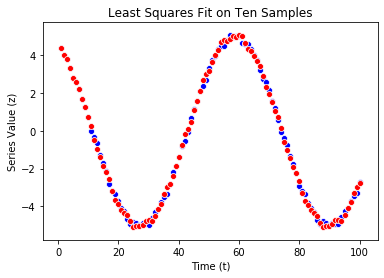

In [32]:
MAX = 100
ax = sns.scatterplot(x=range(1,MAX+1), y=true[:MAX], color='blue')
ax = sns.scatterplot(x=range(1,MAX+1), y=predsUsingRealValues[:MAX], color='red')
ax.set_title("Least Squares Fit on Ten Samples")
ax.set(xlabel='Time (t)', ylabel='Series Value (z)')
ax.get_figure().savefig('least_squares_fit_series')